# Test Implementation RBF regression et classification en Python

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
from cvxopt import matrix, solvers
from math import exp
from scipy.spatial import distance

# Lloyd

In [3]:
def mean (cluster):
    average = []
    for i in range(len(cluster[0])):
        average.append(0) 
    for dimension in range(len(average)):
        for points in cluster:
            average[dimension] += points[dimension]
        average[dimension] /= len(cluster)
    return average

In [4]:
def get_rand_sites(data, clusters):
    sites = []
    initialCenters = set([])
    for i in range(clusters):
        initialCenter = random.randint(0,len(data)-1)
        if initialCenter not in initialCenters:
            initialCenters.add(initialCenter)
            x = data[initialCenter]
            sites.append(x)
    return sites

In [5]:
def lloyd(data, cluster_num, iterations, sites = None):
    clusters = []
    for i in range(cluster_num):
        clusters.append([])
        if sites is None:
            sites = []
            while len(sites) != cluster_num:
                sites = get_rand_sites(data,cluster_num)
    for i in range(iterations):
        for point in range(len(data)):
            closest_site_number = 0
            closest_site_distance = distance.euclidean(sites[closest_site_number], data[point])
            for site_number in range(1,len(sites)):
                site_distance = distance.euclidean(sites[site_number], data[point])
                if site_distance < closest_site_distance:
                    closest_site_number = site_number
                    closest_site_distance = site_distance
            clusters[closest_site_number].append(data[point])
            
        for m in range(cluster_num):
            sites[m] = mean(clusters[m])
            clusters[m].clear()
    return sites

In [10]:
X = np.array([[random.uniform(0.5, 4.5), random.uniform(0.5, 4.5)] for _ in range(20)])
Y = [random.randint(0, 1) for _ in range(20)]
Y = np.array([elt if elt == 1 else -1 for elt in Y])
print(X)
print(Y)

[[1.71989407 3.56611142]
 [3.94541495 3.77863028]
 [2.60444335 1.49467754]
 [3.05519693 2.9260223 ]
 [1.25672378 2.70430196]
 [0.82827581 0.54899879]
 [1.36730706 3.16812563]
 [1.64805864 3.12606384]
 [3.37986416 0.84718661]
 [0.87872505 0.75632516]
 [3.94013859 3.68085241]
 [1.43738928 3.0588086 ]
 [3.67036813 3.78239464]
 [2.85765733 4.20016087]
 [2.36548665 2.26237553]
 [1.23856455 3.44745835]
 [0.69506187 1.53313015]
 [3.95462403 3.10695563]
 [2.88735991 4.17236598]
 [2.82434322 3.45771188]]
[ 1  1  1 -1  1  1  1 -1  1  1 -1  1 -1  1  1 -1 -1  1 -1  1]


[[1.4373892839773825, 3.0588085965654246], [1.7198940719442972, 3.5661114205580255], [2.365486645688147, 2.262375529021982], [3.9401385910711553, 3.6808524064069674], [3.3798641648995753, 0.8471866087488156], [1.2385645549304458, 3.4474583492923987], [2.824343218606422, 3.4577118800859727], [1.3673070612736553, 3.1681256305417387], [3.6703681314764602, 3.782394638002457], [1.6480586421631767, 3.1260638377444296], [3.055196928851259, 2.9260223042426037], [0.6950618716428503, 1.533130154698116], [3.954624034165697, 3.1069556289958626], [2.887359914929601, 4.172365980411156], [0.8282758091479305, 0.5489987886976015], [0.8787250536357907, 0.7563251603307757], [2.6044433507481104, 1.4946775436932835], [1.2567237824666688, 2.7043019571964444], [2.857657333658124, 4.200160868299108], [3.9454149505141776, 3.7786302766227178]]


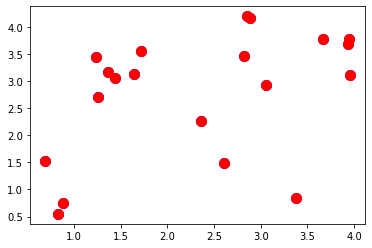

In [24]:
cluster_points = lloyd(X,20,20)
print(cluster_points)

plt.scatter([p[0] for p in X], [p[1] for p in X], c='blue', s=100)
plt.scatter([p[0] for p in cluster_points], [p[1] for p in cluster_points], c='red', s=100)

plt.show()

In [20]:
y_y = 0.1
BigMatrix = []
for i in range(len(X)):
    BigMatrix.append([])
    for j in range(len(cluster_points)):
        BigMatrix[i].append(exp(-y_y*distance.euclidean(X[i],cluster_points[j])*distance.euclidean(X[i],cluster_points[j])))
BigMatrix = np.array(BigMatrix)
print("BigMatrix:",BigMatrix)

BigMatrix: [[0.82491011 0.62773968 0.91299314 0.59112958]
 [0.37093871 0.99588486 0.8485259  0.52805189]
 [0.76350631 0.54882781 0.62424197 0.99664737]
 [0.67304211 0.89461899 0.93290263 0.81794553]
 [0.98245697 0.46539412 0.74705643 0.69085957]
 [0.72926882 0.15677687 0.26998063 0.61917457]
 [0.9226146  0.52322778 0.82361828 0.62670062]
 [0.91175101 0.59549212 0.87529148 0.68242793]
 [0.4976263  0.46045066 0.42987557 0.9204736 ]
 [0.78308117 0.18254896 0.31154783 0.65486831]
 [0.38262768 0.99873323 0.85075248 0.55188657]
 [0.93624568 0.53611787 0.82833088 0.66138803]
 [0.42841554 0.99192698 0.90331287 0.55772602]
 [0.52256802 0.86796245 0.96825549 0.49115439]
 [0.86648726 0.66752538 0.81400113 0.93202257]
 [0.87477606 0.49736902 0.81115772 0.5463713 ]
 [0.92296445 0.23816257 0.43004616 0.64657933]
 [0.4306884  0.97662067 0.82168855 0.6808642 ]
 [0.52277919 0.87607313 0.96989421 0.4981833 ]
 [0.66380104 0.89349049 0.9933307  0.69077004]]
